In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl

from pycircstat2 import Circular, load_data

%load_ext jupyter_black

# Zar, 2010

## Example 26.1 
### Conversion of Times Measured on a Circular Scal to Corresponding Angular Directions `time2float()`

In [2]:
from pycircstat2.utils import data2rad, time2float

In [3]:
# 1. Given a time of day of 06:00 hr
alpha = data2rad(time2float("06:00"), k=24)
np.rad2deg(alpha)

90.0

In [4]:
# 2. Given a time of day of 06:15 hr
alpha = data2rad(time2float("06:15"), k=24)
np.rad2deg(alpha).round(3)

93.75

In [5]:
# 3. Given the 14th day of February, being the 45th day of the year
alpha = data2rad(45, k=365)
np.rad2deg(alpha).round(3)

44.384

## Example 26.2

### A Sample of Circular Data.

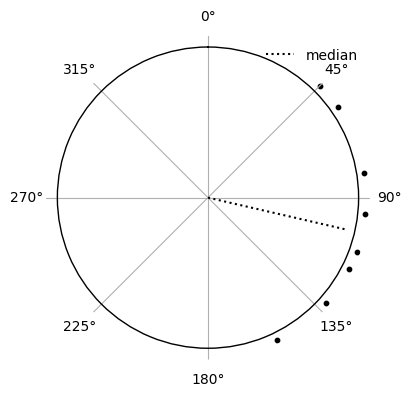

In [6]:
d1 = load_data("D1", source="zar")["θ"].values
c1 = Circular(data=d1)

# Figure 26.2
c1.plot(
    figsize=(4, 4),
    plot_rose=False,
    plot_density=False,
    plot_mean=False,
    plot_median=True,
    plot_median_ci=False,
)

## Example 26.3

### A Sample of Circular Dawta. Presented as a Frequency Table (aka Grouped data)

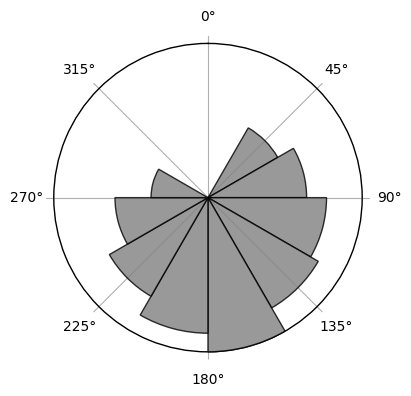

In [7]:
d2 = load_data("D2", source="zar")
c2 = Circular(data=d2["θ"].values, w=d2["w"].values)

# figure 26.4
c2.plot(
    figsize=(4, 4),
    plot_rose=True,
    plot_density=False,
    plot_mean=False,
    plot_median=False,
    plot_median_ci=False,
    rlim=(0, 25),
)

## Example 26.4 

### Calculating the Mean Angle for Continuous / Ungrouped Data `circ_mean()`

In [8]:
from pycircstat2.descriptive import circ_mean

from pycircstat2.utils import data2rad

d1 = load_data("D1", source="zar")["θ"].values
n = len(d1)
alpha = data2rad(d1, k=360)

sina = np.sin(alpha)
cosa = np.cos(alpha)

frame = pl.DataFrame(
    {
        "α": alpha,
        "sin(α)": sina,
        "cos(α)": cosa,
    }
)
X = np.sum(sina) / n
Y = np.sum(cosa) / n
r = np.sqrt(X**2 + Y**2)
S = X / r
C = Y / r
μ = np.arctan2(S, C) if S != 0 and C != 0 else np.arccos(C)
print(frame)
print(f"X = ∑sin(α) = {X:.5f}; Y = ∑cos(α) = {Y:.5f}")
print(f"n = {n}")
print(f"r = √(X^2 + Y^2) = {r:.5f}")
print(f"C = cos(μ) = {C:.5f}; S = sin(μ) = {S:.5f}")
print(f"μ = {np.rad2deg(μ):.0f}°")
# np.rad2deg(c1.mean).round(0)


assert circ_mean(alpha=alpha) == μ

shape: (8, 3)
┌──────────┬──────────┬───────────┐
│ α        ┆ sin(α)   ┆ cos(α)    │
│ ---      ┆ ---      ┆ ---       │
│ f64      ┆ f64      ┆ f64       │
╞══════════╪══════════╪═══════════╡
│ 0.785398 ┆ 0.707107 ┆ 0.707107  │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 0.959931 ┆ 0.819152 ┆ 0.573576  │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 1.413717 ┆ 0.987688 ┆ 0.156434  │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 1.675516 ┆ 0.994522 ┆ -0.104528 │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 1.919862 ┆ 0.939693 ┆ -0.342    │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 2.042035 ┆ 0.891007 ┆ -0.4539   │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 2.303835 ┆ 0.743145 ┆ -0.669131 │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 2.687807 ┆ 0.438371 ┆ -0.898794 │
└──────────┴──────────┴───────────┘
X = ∑sin(α) = 0.81509; Y = ∑cos(α) = -0.12892
n = 8
r = √(X^2 + Y^2) = 0.82522
C = cos(μ) = -0.15622; S = sin(μ) = 0.98772
μ = 99°


## Example 26.5

### Calculating the Mean Angle for Grouped Data `circ_mean()`

In [9]:
d2 = load_data("D2", source="zar")
alpha = data2rad(d2["θ"].values, k=360)
w = d2["w"].values
select = w != 0
alpha = alpha[select]
w = w[select]
n = np.sum(w)

sina = np.sin(alpha)
cosa = np.cos(alpha)

fsina = w * sina
fcosa = w * cosa

frame = pl.DataFrame(
    {
        "α": d2["θ"].values[select],
        "f": w,
        "sin(α)": sina,
        "f * sin(α)": fsina,
        "cos(α)": cosa,
        "f * cos(α)": fcosa,
    }
)
pl.Config.set_tbl_rows(10)

X = np.sum(fsina) / n
Y = np.sum(fcosa) / n
r = np.sqrt(X**2 + Y**2)
S = X / r
C = Y / r
μ = np.arctan2(S, C) if S != 0 and C != 0 else np.arccos(C)
print(frame)
print(f"X = ∑sin(α) / n = {X:.5f}; Y = ∑cos(α) / n = {Y:.5f}")
print(f"n = {n}")
print(f"r = √(X^2 + Y^2) = {r:.5f}")
print(f"C = cos(μ) = {C:.5f}; S = sin(μ) = {S:.5f}")
print(f"μ = {np.rad2deg(μ):.0f}°")

assert circ_mean(alpha=alpha, w=w) == μ

shape: (9, 6)
┌─────┬─────┬───────────┬────────────┬───────────┬────────────┐
│ α   ┆ f   ┆ sin(α)    ┆ f * sin(α) ┆ cos(α)    ┆ f * cos(α) │
│ --- ┆ --- ┆ ---       ┆ ---        ┆ ---       ┆ ---        │
│ i64 ┆ i64 ┆ f64       ┆ f64        ┆ f64       ┆ f64        │
╞═════╪═════╪═══════════╪════════════╪═══════════╪════════════╡
│ 45  ┆ 6   ┆ 0.707107  ┆ 4.242641   ┆ 0.707107  ┆ 4.242641   │
├╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 75  ┆ 9   ┆ 0.965926  ┆ 8.693332   ┆ 0.258819  ┆ 2.329371   │
├╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 105 ┆ 13  ┆ 0.965926  ┆ 12.557036  ┆ -0.258819 ┆ -3.364648  │
├╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 135 ┆ 15  ┆ 0.707107  ┆ 10.606602  ┆ -0.707107 ┆ -10.606602 │
├╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 165 ┆ 22  ┆ 0.258819  ┆ 5.694019   ┆ -0.965926 ┆ -21.250368 │
├╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 195 ┆ 17  ┆ -0.258819 ┆ 

## Example 26.6

### The 95% Confidence Interval for Mean Angle `circ_mean_ci()`

In [10]:
from scipy.stats import chi2

d1 = load_data("D1", source="zar")["θ"].values
n = len(d1)
alpha = data2rad(d1, k=360)

m, r = circ_mean(alpha=alpha, return_r=True)
R = n * r

ci = 0.95
χ2 = chi2.isf(1 - ci, 1)

num = np.sqrt((2 * n * (2 * R**2 - n * χ2)) / (4 * n - χ2))
inner = num / R
d = np.arccos(inner)
LB = np.rad2deg(m) - np.rad2deg(d)
UB = np.rad2deg(m) + np.rad2deg(d)

print(f"n={n}; μ={np.rad2deg(m):.0f}; r={r:.5f}; R={R:.4f}; χ2(0.05, 1)={χ2:.3f}")
print(f"d = arccos({inner:.5f}) = {np.rad2deg(d):.0f}°")
print(f"95% CI= [{LB:.0f}°, {UB:.0f}°]")

from pycircstat2.descriptive import circ_mean_ci

assert (
    np.rad2deg(circ_mean_ci(alpha=alpha, method="approximate")).round()
    == np.array([LB, UB]).round()
).all()

n=8; μ=99; r=0.82522; R=6.6017; χ2(0.05, 1)=3.841
d = arccos(0.85776) = 31°
95% CI= [68°, 130°]


## Example 26.7 

### Axial Data

shape: (15, 3)
┌─────┬──────────┬────────────┐
│ α   ┆ sin(2α)  ┆ cos(2α)    │
│ --- ┆ ---      ┆ ---        │
│ i64 ┆ f64      ┆ f64        │
╞═════╪══════════╪════════════╡
│ 35  ┆ 0.939693 ┆ 0.342      │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 40  ┆ 0.984808 ┆ 0.173648   │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 40  ┆ 0.984808 ┆ 0.173648   │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 45  ┆ 1.0      ┆ 6.1232e-17 │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 45  ┆ 1.0      ┆ 6.1232e-17 │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 55  ┆ 0.939693 ┆ -0.342     │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 60  ┆ 0.866025 ┆ -0.5       │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 215 ┆ 0.939693 ┆ 0.342      │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 220 ┆ 0.984808 ┆ 0.173648   │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 225 ┆ 1.0      ┆ 6.1232e-17 │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 225 ┆ 1.0      ┆ 6.1232e-17 │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 235 ┆ 0.939693 ┆ -0.342     │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 235 ┆ 0.939693 ┆ -0.342     │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌

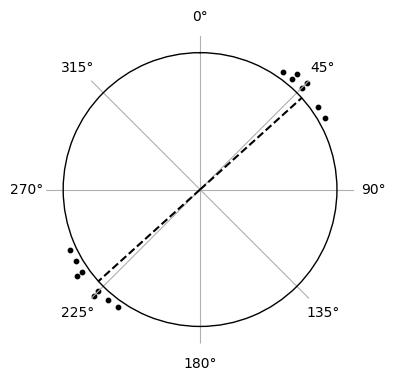

In [11]:
d3 = load_data("D3", source="zar")["θ"].values
alpha = data2rad(d3, k=360)
alpha2 = 2 * alpha % (2 * np.pi)
sin2a = np.sin(alpha2)
cos2a = np.cos(alpha2)

frame = pl.DataFrame(
    {
        "α": d3,
        "sin(2α)": sin2a,
        "cos(2α)": cos2a,
    }
)
pl.Config.set_tbl_rows(15)

print(frame)

n = len(alpha)
X = np.sum(sin2a) / n
Y = np.sum(cos2a) / n
r = np.sqrt(X**2 + Y**2)
S = X / r
C = Y / r
μ2 = np.arctan2(S, C) if S != 0 and C != 0 else np.arccos(C)
μ = μ2 / 2
print(f"n={n}; ∑sin(2α) = {np.sum(sin2a):.5f}; ∑cos(2α) = {np.sum(cos2a):.5f}")
print(f"r={r:.5f}")
print(f"S={S:.5f}; C={C:.5f}")
print(
    f"Angle of 2μ = {np.rad2deg(μ2):.1f}°, thus μ = {np.rad2deg(μ2):.1f}°/2 = {np.rad2deg(μ):.0f}°"
)

from pycircstat2 import Axial

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(polar=True)
c3 = Axial(data=d3)
c3.plot(ax=ax, plot_rose=False, plot_mean=False, plot_median=False, plot_density=False)
ax.plot([0, μ], [0, 1], color="black", linestyle="--")
ax.plot([0, μ + np.pi], [0, 1], color="black", linestyle="--")

assert c3.mean.round(4) == μ.round(4)

## Example 26.8

### The Mean of a Set of Mean Angles

(not implemented in pycircstat2 yet.)

shape: (7, 5)
┌────────┬─────┬────────┬───────────┬───────────┐
│ Sample ┆ μ   ┆ r      ┆ X         ┆ Y         │
│ ---    ┆ --- ┆ ---    ┆ ---       ┆ ---       │
│ i64    ┆ i64 ┆ f64    ┆ f64       ┆ f64       │
╞════════╪═════╪════════╪═══════════╪═══════════╡
│ 1      ┆ 160 ┆ 0.8954 ┆ -0.841401 ┆ 0.306245  │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 2      ┆ 169 ┆ 0.7747 ┆ -0.760467 ┆ 0.1478    │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 3      ┆ 117 ┆ 0.4696 ┆ -0.213194 ┆ 0.418417  │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 4      ┆ 140 ┆ 0.8794 ┆ -0.673659 ┆ 0.565267  │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 5      ┆ 186 ┆ 0.3922 ┆ -0.390051 ┆ -0.040996 │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 6      ┆ 134 ┆ 0.6952 ┆ -0.482926 ┆ 0.500085  │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 7      ┆ 171 ┆ 0.3338 ┆ -0.3296   ┆ 0.052218  │
└────────┴─────┴────────┴───────────┴───────────┘
k = 7; n = 10
∑X = -3.69139; ∑Y = 1.

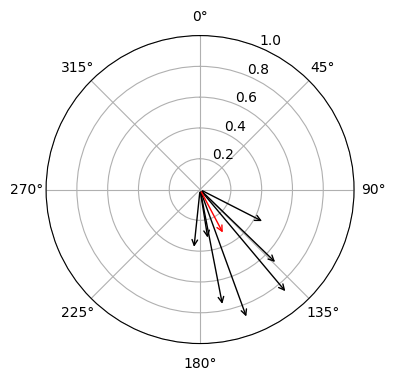

In [12]:
d4 = load_data("D4", source="zar")
ms = data2rad(d4["mean"].values, k=360)
rs = d4["r"].values
X = rs * np.cos(ms)
Y = rs * np.sin(ms)
i = d4.index.values

frame = pl.DataFrame(
    {
        "Sample": i,
        "μ": d4["mean"].values,
        "r": rs,
        "X": X,
        "Y": Y,
    }
)
sumX = np.sum(X)
sumY = np.sum(Y)
k = len(ms)
n = 10  # meta
Xbar = sumX / k
Ybar = sumY / k
r = np.sqrt(Xbar**2 + Ybar**2)
C = Xbar / r
S = Ybar / r
μ = np.arctan2(S, C) if S != 0 and C != 0 else np.arccos(C)

print(frame)
print(f"k = {k}; n = {n}")
print(f"∑X = {sumX:.5f}; ∑Y = {sumY:.5f}")
print(f"Xbar = {Xbar:.5f}; Ybar = {Ybar:.5f}")
print(f"r = {r:.5f}")
print(f"cos(μ) = {C:.5f}; sin(μ) = {S:.5f}")
print(f"μ = {np.rad2deg(μ):.0f}°")

# Figure 26.9
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(polar=True)
for m, r in zip(ms, rs):
    ax.annotate("", xy=(m, r), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(μ, r), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color="red"))
ax.set_theta_zero_location("N")
ax.set_theta_direction("clockwise")

## Example 27.1

### Rayleigh's Test for Circular Uniformity `rayleigh_test()`

H0: the population is uniformly distributed around the circle;  
HA: the population is **not** uniformly distributed around the circle;  

Assumption: there is only one mode. And this methed is for continous / ungrouped data. For grouped data, use `chisquare_test()`

In [13]:
d1 = load_data("D1", source="zar")["θ"].values
c1 = Circular(data=d1)

n = c1.n
r = c1.r
R = c1.R

print(f"n = {n}")
print(f"r = {r:.5f}")
print(f"R = {R:.5f}")

z = c1.R**2 / c1.n
p = np.exp(np.sqrt(1 + 4 * n + 4 * (n**2 - R**2)) - (1 + 2 * n))

print(f"z = R**2/n = {z:.3f} ")
print(f"p = {p:.5f} < 0.05")
print("Reject H0 -> There is a mean population direction.")

from pycircstat2.hypothesis import rayleigh_test

assert np.isclose(rayleigh_test(c1.alpha), (z, p)).all()

n = 8
r = 0.82522
R = 6.60174
z = R**2/n = 5.448 
p = 0.00185 < 0.05
Reject H0 -> There is a mean population direction.


## Example 27.2

### The V Test (Modified Rayleigh Test) for Circular Uniformity under the Alternative of Nonuniformity and a Specified Mean Direction `V_test()`

H0: The population is uniformly distributed around the circle;  
HA: The population is **not** uniformly distributed around the circle, but has a mean of 90°.

In [14]:
d7 = load_data("D7", source="zar")["θ"].values
c7 = Circular(data=d7)

n = c7.n
r = c7.r
R = c7.R
μ = c7.mean

V = R * np.cos(μ - np.deg2rad(90))
u = V * np.sqrt(2 / n)

print(f"n = {n}")
print(f"r = {r:.5f}")
print(f"R = {R:.5f}")
print(f"μ = {np.rad2deg(μ):.0f}°")
print(f"V = R * cos(μ - 90) = {V:.3f}")
print(f"u = V * √(2/n) = {u:.3f}")

from scipy.stats import norm

p = 1 - norm().cdf(u)
print(f"p-value = {p:.7f} < 0.05")
print("Reject H0.")

n = 10
r = 0.95214
R = 9.52137
μ = 94°
V = R * cos(μ - 90) = 9.498
u = V * √(2/n) = 4.247
p-value = 0.0000108 < 0.05
Reject H0.


## Example 27.3

### The One-Sample Test for the Mean Angle `one_sample_test()`

H0: The population has a mean of 90 (μ = 90)  
HA: The population mean is not 90 (μ ≠ 90)

, which is simply testing whether μ falls in or out of the CI of the mean angle.

In [15]:
d7 = load_data("D7", source="zar")["θ"].values
c7 = Circular(data=d7)

if c7.mean_lb < np.deg2rad(90) < c7.mean_ub:
    print("Do not reject H0")
else:
    print("Reject H0")

from pycircstat2.hypothesis import one_sample_test

reject = one_sample_test(angle=np.deg2rad(90), alpha=c7.alpha)
if reject:
    print("Reject H0")
else:
    print("Do not reject H0")

Do not reject H0
Do not reject H0


## Example 27.4

### The Hodges-Ajne Test for Circular Uniformity `omnibus_test()`

H0: The population is uniformly distributed around the circle;  
HA: The population is not uniformly distributed.


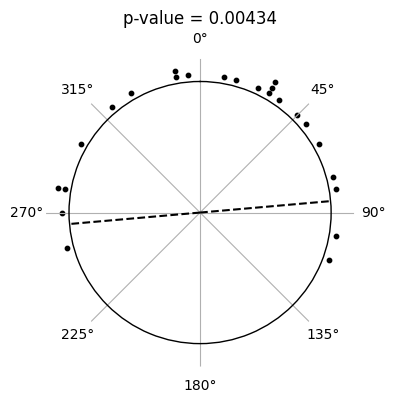

In [16]:
d8 = load_data("D8", source="zar")["θ"].values
c8 = Circular(data=d8)
alpha = c8.alpha
n = len(alpha)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(polar=True)
c8.plot(
    ax=ax,
    plot_density=False,
    plot_rose=False,
    plot_mean=False,
    plot_median=False,
)

# similar to fiding the median by drawing a diameter that can divide the data set into two equal halves
# here we draw a diameter that can divide the data set into two, and their difference is the smallest.

from pycircstat2.utils import angrange

lines = np.linspace(0, np.pi, 360)
lines_rotated = angrange((lines[:, None] - c8.alpha)).round(
    5
)  # whenever compare values in the unit of radian
# round them before the comparison.
# count number of points on the right half circle, excluding the boundaries
right = n - np.logical_and(lines_rotated > 0.0, lines_rotated < np.round(np.pi, 5)).sum(
    1
)
m = np.min(right)
pval = (
    (n - 2 * m)
    * np.math.factorial(n)
    / (np.math.factorial(m) * np.math.factorial(n - m))
    / 2 ** (n - 1)
)

ax.set_title(f"p-value = {pval:.5f}")

lines_final = circ_mean(lines[np.where(np.min(right) == right)[0]])

ax.plot([0, lines_final], [0, 1], color="black", linestyle="--")
ax.plot([0, lines_final + np.pi], [0, 1], color="black", linestyle="--")

from pycircstat2.hypothesis import omnibus_test

assert pval == omnibus_test(alpha)[1]

## Example 27.5

### The Batschelet Test for Circular Uniformity under the Alternative of Nonuniformity and a Specified Mean Direction `batschelet_test()`

H0: The population is uniformly distributed around the circle.  
H1: The population is not uniformly distributed around the circle, but
    is concentrated around 45.

In [17]:
from pycircstat2.hypothesis import batschelet_test
from scipy.stats import binomtest

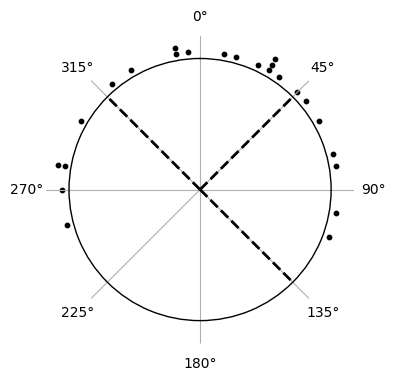

In [18]:
d8 = load_data("D8", source="zar")["θ"].values
c8 = Circular(data=d8)
alpha = c8.alpha
n = len(alpha)

angle_diff = angrange(((np.deg2rad(45) + 0.5 * np.pi) - alpha)).round(5)
m = np.logical_and(angle_diff > 0.0, angle_diff < np.round(np.pi, 5)).sum()
C = n - m

assert (
    binomtest(C, n=n, p=0.5).pvalue
    == batschelet_test(angle=np.deg2rad(45), alpha=alpha)[1]
)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(polar=True)
c8.plot(
    ax=ax,
    plot_density=False,
    plot_rose=False,
    plot_mean=False,
    plot_median=False,
)

ax.plot([0, np.deg2rad(45)], [0, 1], color="black", linestyle="--", linewidth=2)
ax.plot([0, np.deg2rad(45 + 90)], [0, 1], color="black", linestyle="--", linewidth=2)
ax.plot([0, np.deg2rad(45 - 90)], [0, 1], color="black", linestyle="--", linewidth=2)

## Example 27.6

### Testing for Symmetry Around the Median Angle `symmetry_test()`

H0: the population is symmetrical around the median.  
HA: the population is not symmetrical around the median.  

In [19]:
d9 = load_data("D9", source="zar")["θ"].values
c9 = Circular(data=d9)

med = c9.median
alpha = c9.alpha

d = (alpha - med).round(5)
from scipy.stats import wilcoxon

pval = wilcoxon(d, alternative="two-sided").pvalue
assert pval > 0.5

from pycircstat2.hypothesis import symmetry_test

assert symmetry_test(alpha=alpha, median=med)[1] > 0.5

## Example 27.7

### The Watson-Williams Test for Two Samples `watson_williams_test()`

H0: μ1 = μ2  
HA: μ1 ≠ μ2

In [20]:
d10 = load_data("D10", source="zar")
s1 = d10[d10["sample"] == 1]["θ"].values
s2 = d10[d10["sample"] == 2]["θ"].values

c10_s1 = Circular(s1)
c10_s2 = Circular(s2)

from pycircstat2.hypothesis import watson_williams_test

F, pval = watson_williams_test([c10_s1, c10_s2])
print(f"F = {F:.3f}; p-value = {pval:.5f}")

assert np.isclose(F.round(2), 1.61)
assert 0.1 < pval < 0.25

print("Do not reject H0.")

F = 1.611; p-value = 0.22052
Do not reject H0.


## Example 27.8

### The Watson-Williams Test for Three Samples `watson_williams_test()`

H0: All samples are from populations with the same mean angle  
HA: All samples are not from populations with the same mean angle


In [21]:
d11 = load_data("D11", source="zar")
s1 = d11[d11["sample"] == 1]["θ"].values
s2 = d11[d11["sample"] == 2]["θ"].values
s3 = d11[d11["sample"] == 3]["θ"].values

c11_s1 = Circular(s1)
c11_s2 = Circular(s2)
c11_s3 = Circular(s3)


F, pval = watson_williams_test([c11_s1, c11_s2, c11_s3])
print(f"F = {F:.3f}; p-value = {pval:.5f}")

assert np.isclose(F.round(2), 1.86, rtol=1e-2)
assert 0.1 < pval < 0.25

print("Do not reject H0.")

F = 1.865; p-value = 0.18701
Do not reject H0.


## Example 27.9

### Watson's U2 Test for Nonparametric Two-Sample Testing `watson_u2_test()`

H0: The two samples came from the same population,
    or from two populations having the same direction.  
H1: The two samples did not come from the same population,
    or from two populations having the same directions.

In [22]:
# a case without ties

d12 = load_data("D12", source="zar")
s1 = d12[d12["sample"] == 1]["θ"].values
s2 = d12[d12["sample"] == 2]["θ"].values

c12_s1 = Circular(s1)
c12_s2 = Circular(s2)

from pycircstat2.hypothesis import watson_u2_test

U2, pval = watson_u2_test([c12_s1, c12_s2])
print(f"U2 = {U2:.3f}; p-value = {pval:.5f}")

assert np.isclose(U2.round(3), 0.146)
assert 0.1 < pval < 0.20

U2 = 0.146; p-value = 0.11261


In [23]:
# a case with ties

d13 = load_data("D13", source="zar")
s1 = d13[d13["sample"] == 1]["θ"].values
w1 = d13[d13["sample"] == 1]["w"].values
s2 = d13[d13["sample"] == 2]["θ"].values
w2 = d13[d13["sample"] == 2]["w"].values

c13_s1 = Circular(data=s1, w=w1)
c13_s2 = Circular(data=s2, w=w2)

from pycircstat2.hypothesis import watson_u2_test

U2, pval = watson_u2_test([c13_s1, c13_s2])
print(f"U2 = {U2:.3f}; p-value = {pval:.5f}")

assert np.isclose(U2.round(4), 0.0612)
assert pval > 0.5

U2 = 0.061; p-value = 0.59716


## Example 27.11

### The Wheeler and Watson Two-Sample Test `wheeler_watson_test()`

H0: The two samples came from the same population.  
H1: The two samples did not come from the same population.

In [24]:
d12 = load_data("D12", source="zar")
c12_s1 = Circular(data=d12[d12["sample"] == 1]["θ"].values)
c12_s2 = Circular(data=d12[d12["sample"] == 2]["θ"].values)

from pycircstat2.hypothesis import wheeler_watson_test

W, pval = wheeler_watson_test([c12_s1, c12_s2])
print(f"W = {W:.3f}; p-value = {pval:.5f}")
assert np.isclose(W.round(3), 3.678)
assert 0.1 < pval < 0.25

W = 3.678; p-value = 0.15895


## Example 27.12

### Two-Sample Testing of Angular Distances `wallraff_test()`

In [25]:
d14 = load_data("D14", source="zar")
c14_s1 = Circular(data=d14[d14["sex"] == "male"]["θ"].values)
c14_s2 = Circular(data=d14[d14["sex"] == "female"]["θ"].values)

from pycircstat2.hypothesis import wallraff_test

U, pval = wallraff_test(angle=np.deg2rad(135), circs=[c14_s1, c14_s2])
print(f"U = {U:.3f}; p-value = {pval:.5f}")

assert np.isclose(U.round(1), 18.5)
assert pval > 0.2

U = 18.500; p-value = 0.77510


## Example 27.13

### Two Sample Testing for Angular Dispersion `wallraff_test()`

In [26]:
d15 = load_data("D15", source="zar")
s1 = time2float(d15[d15["sex"] == "male"]["time"].values)
s2 = time2float(d15[d15["sex"] == "female"]["time"].values)

c15_s1 = Circular(data=s1)
c15_s2 = Circular(data=s2)

U, pval = wallraff_test(
    angle=np.deg2rad(time2float(["7:55", "8:15"])), circs=[c15_s1, c15_s2]
)
print(f"U = {U:.3f}; p-value = {pval:.5f}")
assert np.isclose(U, 13.0)
assert pval > 0.05

U = 13.000; p-value = 0.17524


## Example 27.20

### Angular-Angular Correlation `aacorr()`


In [27]:
# parametric

d20 = load_data("D20", source="zar")

a = Circular(data=d20["Insect"].values)
b = Circular(data=d20["Light"].values)

from pycircstat2.correlation import aacorr

raa, reject = aacorr(a, b, test=True, method="fl")
print(f"r = {raa:.5f}, reject? = {reject}")

r = 0.89451, reject? = True


## Example 27.21

### Angular-Linear Correlation `alcorr()`

In [28]:
d21 = load_data("D21", source="zar")

a = Circular(data=d21["θ"].values).alpha
x = d21["X"].values

from pycircstat2.correlation import alcorr

ral, pval = alcorr(a, x)

print(f"r = {ral:.4f}, pval={pval:.5f}")

assert np.isclose(ral.round(4), 0.9854)
assert 0.025 < pval < 0.05

r = 0.9854, pval=0.03343


## Example 27.22 

### Nonparametric Angular-Angular Correlation `aacorr()`

In [29]:
d22 = load_data("D22", source="zar")
a = Circular(data=d22["evening"].values)
b = Circular(data=d22["morning"].values)
raa, reject = aacorr(a, b, test=True, method="nonparametric")

print(f"r = {raa:.5f}, reject? = {reject}")

r = 0.31006, reject? = False


## Example 27.23

### Chi-Square Goodness of Fit `chisquare_test()`

Even though this method is placed under the Goodness of Fit section, it is used for testing whether the data is uniformly distributed (for grouped data).

In [30]:
d2 = load_data("D2", source="zar")
c2 = Circular(data=d2["θ"].values, w=d2["w"].values)

from pycircstat2.hypothesis import chisquare_test

χ2, pval = chisquare_test(c2.w)
print(f"χ2 = {χ2:.4f}; p-value = {pval:.11f}")

χ2 = 66.5429; p-value = 0.00000000055


## Example 27.24

### Watson's Goodness-of-Fit Testing `watson_test()`

In [31]:
d1 = load_data("D1", source="zar")["θ"].values
c1 = Circular(data=d1)

from pycircstat2.hypothesis import watson_test

U2, pval = watson_test(c1.alpha)
print(f"U2 = {U2:.4f}; p-value = {pval:.11f}")

U2 = 0.3009; p-value = 0.00410000000


In [32]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark -p pycircstat2

Last updated: 2023-04-18 11:16:09CEST

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

pycircstat2: 0.1.0

numpy     : 1.23.5
matplotlib: 3.7.0
polars    : 0.13.13

Watermark: 2.3.1

